<a href="https://www.kaggle.com/satendersiwach/central-limit-theorem?scriptVersionId=86145070" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
#Data visualization
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Suppose that we are interested in estimating the average height among all people. Collecting data for every person in the world is impractical. While we can’t obtain a height measurement from everyone in the population, we can still sample some people. No question is how can we do it?

The **Central Limit Theorem** addresses this question exactly. Formally, it states that if we sample from a population using a sufficiently large sample size, the mean of the samples will be normally distributed (assuming true random sampling) and most importantly this will be true regardless of the distribution of the original population.

In [2]:
def re_sample(distribution, N):
    sampleSum = 0
    for i in range(N):
        sampleSum += random.choice(distribution)
    return float(sampleSum) / float(N)

In [3]:
def run_sample_demo(N,distribution,dist_min,dist_max, plot = False, num_bins = None):
    means = []
    for i in range(1000):
        means.append(re_sample(distribution, N))
    if plot:
        title = "Sample Mean Distribution with N = %s" % N
        plot_distribution(means, title , dist_min, dist_max, num_bins)
    #return means


In [4]:
def plot_distribution(distribution, title = None, bin_min = None, bin_max = None, num_bins = None):

    sns.set_palette("deep", desat=.65)
    if num_bins != None:
        bin_size = (bin_max - bin_min) / num_bins
        manual_bins = range(bin_min, bin_max + int(bin_size), int(bin_size))
        [n, bins, patches] = plt.hist(distribution, bins = manual_bins)
    else:
        [n, bins, patches] = plt.hist(distribution)
    if title != None:
        plt.title(title)
    plt.xlim(bin_min, bin_max)
    plt.ylim(0, max(n) + 2)
    plt.ylabel("Frequency")
    plt.xlabel("Observation")
    plt.show()

Let create uniformed sample distribution for our analysis. 

In [5]:
def create_uniform_sample_distribution():
    return range(100)


Now let's check how is our distribution looks like. I manually generated the below population by choosing numbers between 0 and 100, and plotted it as a histogram. The height of the histogram denotes the frequency of the number in the population.

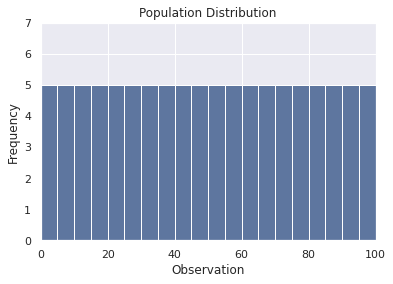

In [6]:
distribution = create_uniform_sample_distribution()    
plot_distribution(distribution, "Population Distribution", 0, 100, 20)

As we can see, the distribution is pretty ugly. It certainly isn’t normal, uniform, or any other commonly
known distribution. In order to sample from the above distribution, we need to define a sample size,
referred to as N. This is the number of observations that we will sample at a time. Suppose that we choose
N to be 3. This means that we will sample in groups of 3. So for the above population, we might sample
groups such as [5, 20, 41], [60, 17, 82], [8, 13, 61], and so on.
Suppose that we gather 1,000 samples of 3 from the above population. For each sample, we can compute
its average. If we do that, we will have 1,000 averages. This set of 1,000 averages is called a sampling
distribution, and according to Central Limit Theorem, the sampling distribution will approach a normal
distribution as the sample size N used to produce it increases. Here is what our sample distribution looks
like for N = 3. 

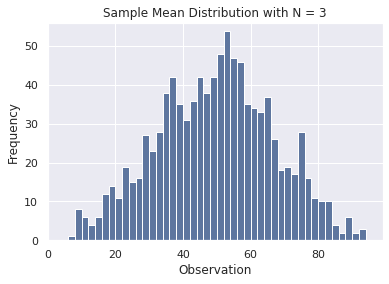

In [7]:
dist_min = min(distribution)
dist_max = max(distribution)
run_sample_demo(N = 3,distribution=distribution, dist_min=dist_min, dist_max=dist_max, plot = True, num_bins = 40)

As you can see it's looks like uniform distribution but not like normal distribution. So let's repeat the same process again with N=10 size.

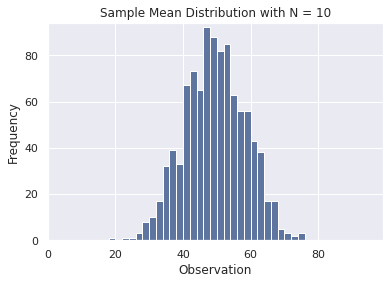

In [8]:
run_sample_demo(N = 10,distribution=distribution, dist_min=dist_min, dist_max=dist_max, plot = True, num_bins = 40)

Now we can see that if we repeat the same process
with a larger sample size, we should see the sampling distribution start to become more normal. Now let's repeat same process with N=30

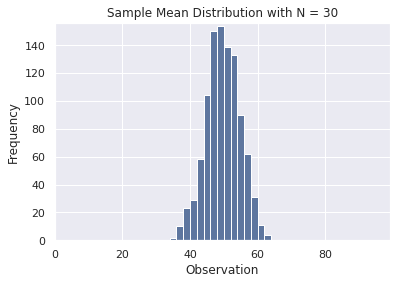

In [9]:
run_sample_demo(N = 30,distribution=distribution, dist_min=dist_min, dist_max=dist_max, plot = True, num_bins = 40)

The above plots demonstrate that as the sample size N is increased, the resultant sample mean distribution becomes more normal. Further, the distribution variance also decreases. 